In [27]:
# This notebook describes a pre-processing pipeline that
# converts EEG recordings (in a native EDF format)
# to a scaled and standardized numpy format
# that is compatible with the Telemanom LSTM framework

In [ ]:
import os
import os.path as op
import mne
import numpy as np
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the data and exclude non-seeg channels
# EDF files should be stored in a folder called "edfs"

filepath= '/mnt/edfs/<insert file path to edf file>
raw = mne.io.read_raw_edf(input_fname=filepath, exclude=('Event', 'EKG1', 'EKG2', 'C123', 'C124', 'C125', 'C126', 'C127', 'C128','Fp1',
 'F7','T3','T5','O1','F3','C3','P3','Fp2','F8','T4','T6','O2','F4','C4','P4','Fz','Cz','Pz', 'C178',
 'C179',
 'C180',
 'C181',
 'C182',
 'C183',
 'C184',
 'C185',
 'C186',
 'C187',
 'C188',
 'C189',
 'C190',
 'C191',
 'C192',
 'C193',
 'C194',
 'C195',
 'C196',
 'C197',
 'C198',
 'C199',
 'C200',
 'C201',
 'C202',
 'C203',
 'C204',
 'C205',
 'C206',
 'C207',
 'C208',
 'C209',
 'C210',
 'C211',
 'C212',
 'C213',
 'C214',
 'C215',
 'C216',
 'C217',
 'C218',
 'C219',
 'C220',
 'C221',
 'C222',
 'C223',
 'C224',
 'C225',
 'C226',
 'C227',
 'C228',
 'C229',
 'C230',
 'C231',
 'C232',
 'C233',
 'C234',
 'C235',
 'C236',
 'C237',
 'C238',
 'C239',
 'C240',
 'C241',
 'C242',
 'C243',
 'C244',
 'C245',
 'C246',
 'C247',
 'C248',
 'C249',
 'C250',
 'C251',
 'C252',
 'C253',
 'C254',
 'C255',
 'C256',
 'DC1',
 'DC2',
 'DC3',
 'DC4',
 'DC5',
 'DC6',
 'DC7',
 'DC8',
 'DC9',
 'DC10',
 'DC11',
 'DC12',
 'DC13',
 'DC14',
 'DC15',
 'DC16',
 'TRIG',
 'OSAT',
 'PR', 'Fp1', '01',
 '02',
 'F3',
 'C3',
 'P3',
 'F7',
 'T3',
 'T5',
 'O1',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'F8',
 'T4',
 'T6',
 'O2',
 'FZ',
 'CZ',
 'PZ', 'FP1',
 'FP2', 'C59',
 'C60',
 'C61',
 'C62',
 'C160',
 'C161',
 'C162',
 'C163',
 'C164',
 'C165',
 'C166',
 'C167',
 'C168',
 'C169',
 'C170',
 'C171',
 'C172',
 'C173',
 'C174',
 'C175',
 'C176',
 'C177',
 'C214',
 'C64', 'C158',
 'C159',
 'C63',
 'C215',
 'C216',
 'C217',
 'C218',
 'C219',
 'C220',
 'C221',
 'C222',
 'C223',
 'C224',
 'C225',
 'C226',
 'C227',
 'C228',
 'C229',
 'C230',
 'C231',
 'C232',
 'C233',
 'C234',
 'C235',
 'C236',
 'C237',
 'C238',
 'C239',
 'C240',
 'C241',
 'C242',
 'C243',
 'C244',
 'C245',
 'C246',
 'C247',
 'C248',
 'C249',
 'C250',
 'C251',
 'C252',
 'C253',
 'C254',
 'C255',
 'C256',
 'DC1',
 'DC2',
 'DC3',
 'DC4',
 'DC5',
 'DC6',
 'DC7',
 'DC8',
 'DC9',
 'DC10',
 'DC11',
 'DC12',
 'DC13',
 'DC14',
 'DC15',
 'DC16',
 'TRIG', 'C156', 'C57', 'C138',
 'C139',
 'C140',
 'C141',
 'C142',
 'C143',
 'C144',
 'C145',
 'C146',
 'C147',
 'C148',
 'C149',
 'C150',
 'C151',
 'C152',
 'C153',
 'C154',
 'C155',
 'C58',
 'C157',
 'OSAT',
 'PR','STI 014'), preload=True)
raw.info

In [96]:
# Confirm the correct sEEG channel names that are present

raw.ch_names

['L mOlF1',
 'L mOlF2',
 'L mOlF3',
 'L mOlF4',
 'L mOlF5',
 'L mOlF6',
 'L mOlF7',
 'L mOlF8',
 'L mOlF9',
 'L mOlF10',
 'R mOlF1',
 'R mOlF2',
 'R mOlF3',
 'R mOlF4',
 'R mOlF5',
 'R mOlF6',
 'R mOlF7',
 'R mOlF8',
 'R mOlF9',
 'R mOlF10',
 'L aCaS1',
 'L aCaS2',
 'L aCaS3',
 'L aCaS4',
 'L aCaS5',
 'L aCaS6',
 'L aCaS7',
 'L aCaS8',
 'L aCaS9',
 'L aCaS10',
 'R aCaS1',
 'R aCaS2',
 'R aCaS3',
 'R aCaS4',
 'R aCaS5',
 'R aCaS6',
 'R aCaS7',
 'R aCaS8',
 'R aCaS9',
 'R aCaS10',
 'L mCmS1',
 'L mCmS2',
 'L mCmS3',
 'L mCmS4',
 'L mCmS5',
 'L mCmS6',
 'L mCmS7',
 'L mCmS8',
 'R mCmS1',
 'R mCmS2',
 'R mCmS3',
 'R mCmS4',
 'R mCmS5',
 'R mCmS6',
 'R mCmS7',
 'R mCmS8',
 'R mCmS9',
 'R mCmS10',
 'L aIlS1',
 'L aIlS2',
 'L aIlS3',
 'L aIlS4',
 'L aIlS5',
 'L aIlS6',
 'L aIlS7',
 'L aIlS8',
 'L aIlS9',
 'L aIlS10',
 'L aIlS11',
 'L aIlS12',
 'L aIlS13',
 'L aIlS14',
 'R aIlS1',
 'R aIlS2',
 'R aIlS3',
 'R aIlS4',
 'R aIlS5',
 'R aIlS6',
 'R aIlS7',
 'R aIlS8',
 'R aIlS9',
 'R aIlS10',
 'R a

In [ ]:
# Set up lowpass filter

raw.filter(None, 50., fir_design='firwin')

Effective window size : 4.000 (s)
Channel locations not available. Disabling spatial colors.


<ipython-input-100-3c16e99c0028>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(area_mode='range', tmax=10.0, average=False)


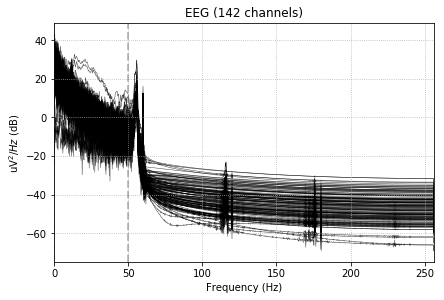

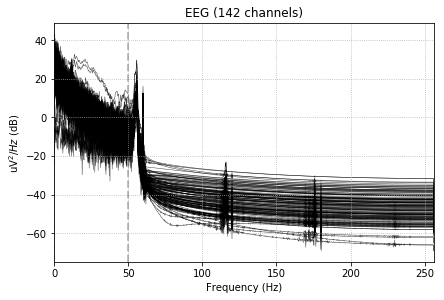

In [100]:
raw.plot_psd(area_mode='range', tmax=10.0, average=False)

In [101]:
#Convert an individual edf file to a npy array
# Converted npy arrays for each channel will be stored in a folder called "seeg_npys"

import os
import os.path as op
import mne
import numpy as np

os.mkdir("/mnt/seeg_npys/")

for channel in range(len(raw.ch_names)):
    array = raw.get_data(channel, 0, int(raw.__len__()), return_times=True)
    os.chdir("/mnt/seeg_npys/")
    np.save('<insert recording name>_{}'.format(raw.ch_names[channel]), array)

#Remove spaces in file names
    
for npyfile in os.listdir("/mnt/seeg_npys/"):
    os.rename(npyfile, npyfile.replace(" ", "_"))

In [102]:
#Transpose each data file for future operations
# and store the transposed files in a new folder "npys_tposed"
# NOTE: this step can instead be combined with the previous step
# to avoid having 2 separate folders of npy arrays

os.mkdir("/mnt/npys_tposed/")

for npyfile in os.listdir("/mnt/seeg_npys/"):
    indiv_path='/mnt/seeg_npys/' + npyfile
    nparray=np.load(indiv_path)
    nparray_tposed = nparray[0].transpose()
    os.chdir("/mnt/npys_tposed/")
    np.save('{}'.format(npyfile), nparray_tposed)

In [103]:
##Average leads belonging to same channel and scale that channel

# Make new directory for averaged and scaled channels
os.mkdir("/mnt/av_scaled/")

# Set up min/max scaler to -1,1
scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))

list_of_all = [filename for filename in os.listdir("/mnt/npys_tposed/") if filename.endswith(".npy")]
uniques_list = [filename[:-5] for filename in os.listdir("/mnt/npys_tposed/") if filename.endswith("1.npy") and not filename.endswith("11.npy")]

for name in uniques_list:
    loaded_list = []
    list_of_same_chans = [filelon for filelon in list_of_all if filelon.startswith(name)]
    for chan in list_of_same_chans:
        path="/mnt/npys_tposed/" + chan
        loaded_list.append(np.load(path))
    multiarray = np.concatenate(loaded_list, axis=1)
    avg = np.mean(multiarray, axis=1, dtype='float64')
    reshaped=avg.reshape(-1,1)
    scaler.fit(reshaped)
    scaled = scaler.transform(reshaped)
    os.chdir("/mnt/av_scaled/")
    np.save('{}'.format(name), scaled)


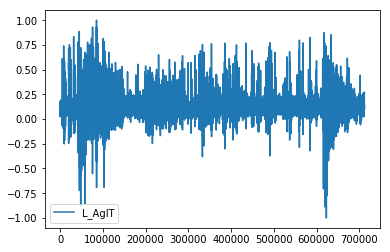

In [386]:
#Simple plot of data to confirm correct operations

processed_test_file = np.load("/mnt/av_scaled/<insert filename>")
plt.plot(processed_test_file)
plt.legend(['<channel name>'], loc='lower left')
plt.show()


In [112]:
#Split scaled files into train/test sets
# Can modify the train:test split by adjusting the ratio in the train and test lines
# The telemanom framework (stored in a folder called "final_clips") requires identically
# named train and test files that must be stored
# in /data/train/ and /data/test/ folders, respectively

os.mkdir("/mnt/final_clips/")

desiredfiles = [npyfile for npyfile in os.listdir("/mnt/av_scaled") if npyfile.startswith("recording_45")]
for file in desiredfiles:
    fullpath='/mnt/av_scaled/' + file
    array = np.load(fullpath)
    train = array[int(0 * len(array)):int(0.5 * len(array))]
    os.chdir("/mnt/final_clips/data/train/")
    np.save('{}'.format(file), train)
    test = array[int(0.5 * len(array)):int(len(array))]
    os.chdir("/mnt/final_clips/data/test/")
    np.save('{}'.format(file), test)


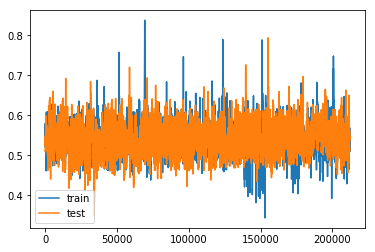

In [118]:
# Plot an overlay of train and test clips

ex_train = np.load("/mnt/final_clips/data/train/<insert file name>.npy")
ex_test = np.load("/mnt/final_clips/data/test/<insert file name>.npy")

plt.plot(ex_train)
plt.plot(ex_test)
plt.legend(['train', 'test'], loc='lower left')
plt.show()

In [ ]:
# The npy files should now be ready for ingestion into the LSTM